# 🚀 Quick Commerce Data Analysis: Business Insights & KPI Dashboard using Python

## 🎯 Business Problem Statement
This project analyzes Quick Commerce platforms (Blinkit, Zepto, Swiggy Instamart, etc.) to identify:
- Revenue leaders
- Customer satisfaction trends
- Operational efficiency
- Impact of discounts
- High-growth cities for expansion

The goal is to generate data-driven business insights for strategic decision-making.

In [158]:
# Import Python Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import plotly.express as px

In [159]:
# Load Dataset
df = pd.read_csv('q_commerce_modified_data.csv')
df

,Order_ID,Company,City,Customer_Age,Order_Value,Delivery_Time_Min,Distance_Km,Items_Count,Product_Category,Payment_Method,Customer_Rating,Discount_Applied,Delivery_Partner_Rating
0,1000001,Swiggy Instamart,Noida,46,702,19,12.0,12,Dairy,Wallet,2,1,3
1,1000002,Flipkart Minutes,Amritsar,56,1007,20,12.7,10,Snacks,Cash on Delivery,2,0,3
2,1000003,Flipkart Minutes,Mumbai,18,1212,17,4.8,19,Personal Care,Cash on Delivery,3,0,4
3,1000004,Swiggy Instamart,Delhi,23,1179,6,6.4,2,Dairy,Credit Card,5,1,5
4,1000005,Dunzo,Mumbai,44,586,12,2.4,13,Household,Wallet,4,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
947747,1999996,Big Basket,Mumbai,48,72,18,3.0,19,Fruits & Vegetables,Wallet,4,0,3
947748,1999997,Swiggy Instamart,Mumbai,33,1510,18,10.5,9,Beverages,Debit Card,4,1,4
947749,1999998,Jio Mart,Noida,29,637,18,2.6,6,Groceries,Cash on Delivery,3,0,5
947750,1999999,Dunzo,Pune,42,1103,13,7.8,12,Snacks,Wallet,4,1,4


<br><br>

---

# 📊 Business Problem Solving & Exploratory Data Analysis (EDA)

## Q.1) Which quick commerce platform has the highest total revenue?

In [160]:
# # Group Data - Calculate total order value for companies
company_revenue = df.groupby('Company')['Order_Value'].sum().sort_values(ascending=False)
company_revenue

Company
Swiggy Instamart    76407756
Blinkit             72499575
Zepto               70339672
Big Basket          67884762
Flipkart Minutes    66998289
Amazon Now          65832504
Dunzo               64007579
Jio Mart            57112860
Name: Order_Value, dtype: int64

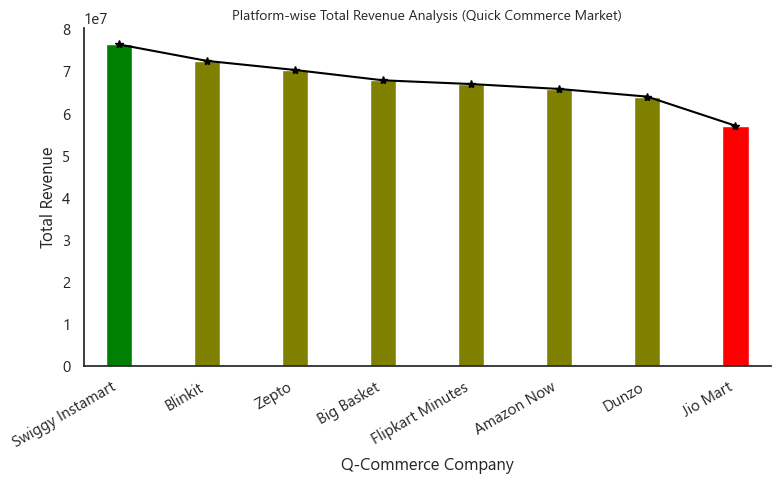

In [161]:
# Bar & Line Chart 
plt.figure(figsize = (8,5))

# Find min and max revenue 
max_value = company_revenue.max()
min_value = company_revenue.min()

#Assign colors based on value 
colors = ['green' if val == max_value else
          'red' if val == min_value else
          'olive'
           for val in company_revenue
          ]

# Draw Bar & Line Chart
company_revenue.plot(kind = 'bar', color = colors, width = 0.3)
company_revenue.plot(kind = 'line', color = 'black', marker = '*')

plt.xlabel("Q-Commerce Company", fontsize = 12)
plt.ylabel("Total Revenue", fontsize = 12)
plt.title("Platform-wise Total Revenue Analysis (Quick Commerce Market)", fontsize=10, fontweight='bold')
plt.xticks(rotation = 30, ha = 'right')

ax = plt.gca()   #gca - get current axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

📊 Metric Used: Total Revenue = Sum of Order_Value grouped by Company.

## 📌 Key Insight:
***Swiggy Instamart emerges as the highest revenue-generating platform, indicating stronger customer demand, higher order volume, and a dominant position in the quick commerce market. This suggests that the platform has a more engaged customer base and efficient operational performance compared to competitors.***

***From a business perspective, this insight can help stakeholders prioritize strategic partnerships, targeted marketing, and resource allocation toward high-performing platforms to maximize overall revenue growth.***

<br><br>

## Q.2) Which platform has the highest average order value (AOV)?

In [162]:
AOV = df.groupby('Company')['Order_Value'].mean().sort_values(ascending=False)
AOV

Company
Swiggy Instamart    644.927250
Blinkit             609.819198
Zepto               593.258314
Big Basket          575.065542
Flipkart Minutes    563.176472
Amazon Now          557.510429
Dunzo               540.317053
Jio Mart            482.914592
Name: Order_Value, dtype: float64

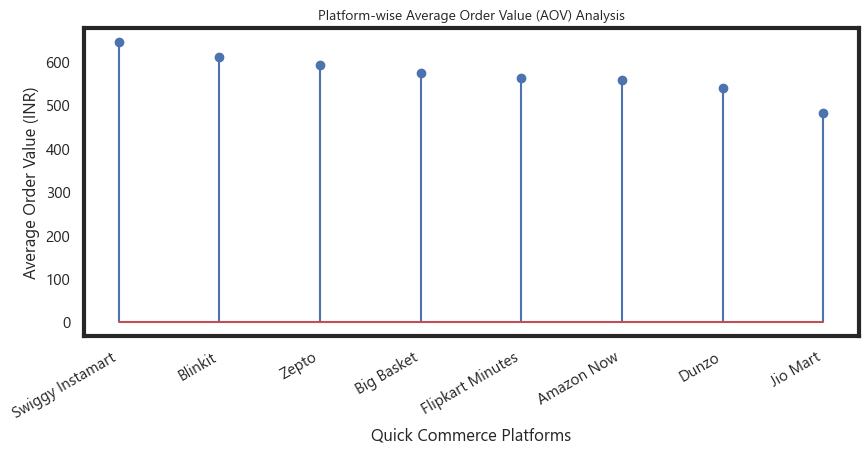

In [163]:
# Stem Chart
plt.figure(figsize=(10,4)) 

plt.stem(AOV.index, AOV.values)

plt.xlabel("Quick Commerce Platforms")
plt.ylabel("Average Order Value (INR)")
plt.title("Platform-wise Average Order Value (AOV) Analysis", fontsize=10, fontweight='bold')
plt.xticks(rotation=30, ha='right')

ax = plt.gca()

# Highlight all four borders
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)

plt.show()

📊 Metric Used: AOV = Mean of Order_Value grouped by Company.

## 📌 Key Insight:
***Swiggy Instamart records the highest Average Order Value (AOV), indicating that customers on this platform tend to place higher-value orders compared to competitors. This suggests stronger purchasing power, effective product assortment, and better customer engagement.***

***Conversely, platforms with lower AOV may focus on increasing basket size through bundle offers, discounts, and cross-selling strategies to enhance revenue efficiency.***

<br><br>

## Q.3) How does Customer Rating vary across platforms?

In [164]:
rating_mean = df.groupby('Company')['Customer_Rating'].mean().sort_values(ascending=False)
rating_mean

Company
Blinkit             3.580762
Swiggy Instamart    3.279443
Zepto               3.203062
Big Basket          3.097902
Flipkart Minutes    3.016316
Amazon Now          2.913417
Jio Mart            2.819747
Dunzo               2.428024
Name: Customer_Rating, dtype: float64

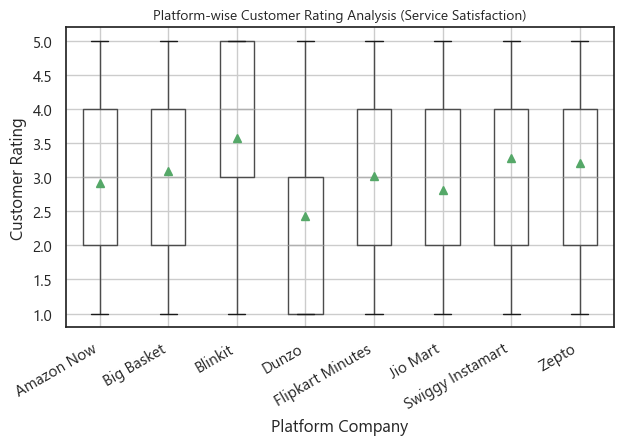

In [165]:
# Box plot 
df.boxplot(column = 'Customer_Rating', by = 'Company', showmeans = True)

plt.suptitle("")
plt.title("Platform-wise Customer Rating Analysis (Service Satisfaction)", fontsize=10, fontweight='bold')
plt.xlabel("Platform Company")
plt.ylabel("Customer Rating")
plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()

📊 Metric Used: Average Customer Rating = Mean of Customer_Rating grouped by Company.

In [166]:
grouped_rating = df.groupby(['Company', 'Customer_Rating']).size().unstack(fill_value=0)

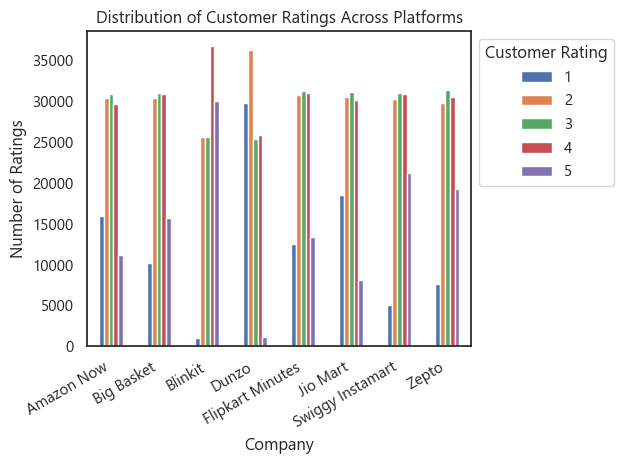

In [167]:
grouped_rating.plot(kind = 'bar')

plt.xlabel("Company")
plt.ylabel("Number of Ratings")
plt.title("Distribution of Customer Ratings Across Platforms")
plt.xticks(rotation=30, ha='right')
plt.legend(title = 'Customer Rating', bbox_to_anchor = (1,1))

plt.tight_layout()
plt.show()

## 📌 Key Insight:
***Blinkit has the highest average customer rating, indicating stronger customer satisfaction and service performance, while Dunzo shows comparatively lower ratings, suggesting scope for improvement in service quality and delivery experience.***

<br><br>

## Q.4) What is the impact of Delivery Time on Delivery Partner Performance (Ratings)?

In [168]:
df['Delivery_Time_Min'].mean()

16.506619875241626

In [169]:
df['Delivery_Partner_Rating'].mean()

3.80029480285982

In [170]:
# Calculate average rating for delivery timings
x = df.groupby('Delivery_Time_Min')['Delivery_Partner_Rating'].mean()

In [171]:
df['Delivery_Time_Min'].corr(df['Delivery_Partner_Rating'])

-0.0027773408026700776

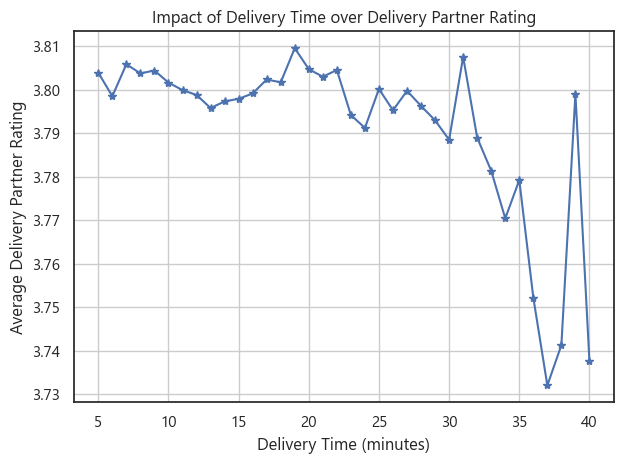

In [172]:
# Line Chart

x.plot(marker = '*')

plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Average Delivery Partner Rating")
plt.title("Impact of Delivery Time over Delivery Partner Rating")
plt.grid(True)

plt.tight_layout()
plt.show()

In [173]:
df['Delivery_Time_Bucket'] = pd.cut(df['Delivery_Time_Min'],
                                    bins = (0,10,20,30,40,50),
                                    labels = ("Very Fast Delivery", "Fast Delivery", "Normal Delivery", "Slow Delivery", "Very Slow Delivery"))

In [174]:
bucket_avg = df.groupby('Delivery_Time_Bucket')['Delivery_Partner_Rating'].mean()
bucket_avg

C:\Users\saksh\AppData\Local\Temp\ipykernel_4440\329286704.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Delivery_Time_Bucket
Very Fast Delivery    3.803231
Fast Delivery         3.800835
Normal Delivery       3.798345
Slow Delivery         3.783646
Very Slow Delivery         NaN
Name: Delivery_Partner_Rating, dtype: float64

In [175]:
df['Delivery_Time_Min'].max()

40

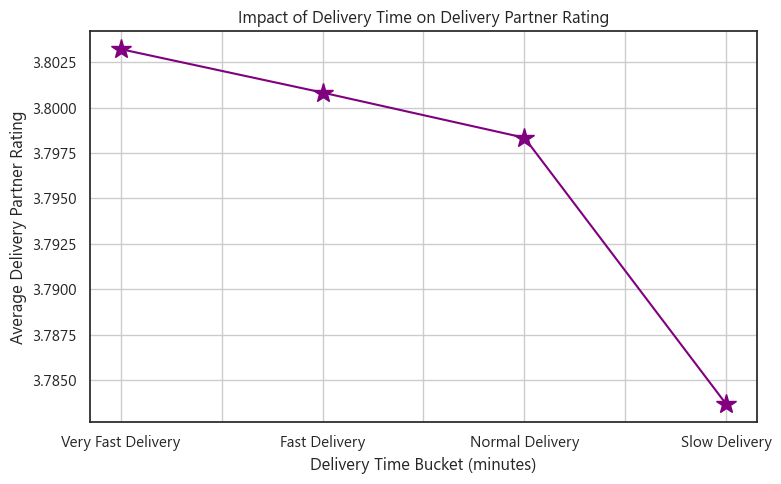

In [176]:
plt.figure(figsize=(8,5))

bucket_avg.plot(marker="*", markersize=15, color="purple")

plt.xlabel("Delivery Time Bucket (minutes)")
plt.ylabel("Average Delivery Partner Rating")
plt.title("Impact of Delivery Time on Delivery Partner Rating")
plt.grid(True)

plt.tight_layout()
plt.show()

## 📌 Key Insight:
***Delivery partner ratings show a slight decline as delivery time increases, indicating that faster deliveries are associated with better partner performance ratings. This suggests that operational efficiency and timely deliveries play a key role in maintaining higher service ratings.***

<br><br>

## Q.5) What is the most popular product category among customers aged 30–40 on Swiggy Instamart in Mumbai?

In [177]:
# Filtering 

df_pc = df[
    (df['Company'] == 'Swiggy Instamart') &
    ((df['Customer_Age'] >= 30) & (df['Customer_Age'] < 40)) & 
    (df['City'] == 'Mumbai')
]

df_pc

,Order_ID,Company,City,Customer_Age,Order_Value,Delivery_Time_Min,Distance_Km,Items_Count,Product_Category,Payment_Method,Customer_Rating,Discount_Applied,Delivery_Partner_Rating,Delivery_Time_Bucket
512,1000537,Swiggy Instamart,Mumbai,38,1157,14,5.7,18,Beverages,Cash on Delivery,4,1,4,Fast Delivery
872,1000910,Swiggy Instamart,Mumbai,32,926,20,14.2,3,Dairy,UPI,2,0,5,Fast Delivery
1148,1001204,Swiggy Instamart,Mumbai,37,234,19,7.6,6,Dairy,Debit Card,5,0,4,Fast Delivery
2783,1002919,Swiggy Instamart,Mumbai,31,423,15,4.0,10,Dairy,Cash on Delivery,2,0,3,Fast Delivery
4038,1004252,Swiggy Instamart,Mumbai,36,50,15,2.2,12,Dairy,Credit Card,3,0,3,Fast Delivery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945478,1997611,Swiggy Instamart,Mumbai,37,448,19,14.0,17,Fruits & Vegetables,Cash on Delivery,5,0,5,Fast Delivery
947020,1999243,Swiggy Instamart,Mumbai,32,747,13,2.4,12,Household,UPI,5,1,5,Fast Delivery
947036,1999259,Swiggy Instamart,Mumbai,35,50,18,7.6,4,Personal Care,Debit Card,5,0,5,Fast Delivery
947444,1999681,Swiggy Instamart,Mumbai,39,375,19,8.7,6,Household,Wallet,2,0,4,Fast Delivery


In [178]:
# Most popular product category 
df_pc['Product_Category'].value_counts()

Product_Category
Dairy                  368
Fruits & Vegetables    343
Groceries              341
Household              340
Snacks                 329
Personal Care          305
Beverages              299
Name: count, dtype: int64

## 📌 Key Insight:
***Dairy emerges as the most popular product category among customers aged 30–40 using Swiggy Instamart in Mumbai, indicating high demand for daily essential and frequently purchased items within this customer segment.***

<br><br>

## Q.6) Which cities should companies prioritize for expansion based on performance metrics?

In [179]:
# Group data and apply aggregate functions
city_perform = df.groupby(['Company','City']).agg(
                                    Total_Orders = ('Order_ID', 'count'),
                                    Avg_Rating = ('Customer_Rating', 'mean'),
                                    Avg_Delivery_Time = ('Delivery_Time_Min', 'mean'), 
                                    Total_Revenue = ('Order_Value', 'sum')
                                    ).reset_index()

city_perform

,Company,City,Total_Orders,Avg_Rating,Avg_Delivery_Time,Total_Revenue
0,Amazon Now,Amritsar,9929,2.896666,18.167388,5469439
1,Amazon Now,Bengluru,9905,3.387683,19.183342,5629936
2,Amazon Now,Chennai,9847,2.904032,18.138722,5363559
3,Amazon Now,Delhi,9918,2.989716,8.294616,5891026
4,Amazon Now,Gurgaon,9797,2.921711,18.166173,6680388
...,...,...,...,...,...,...
91,Zepto,Jaipur,9678,3.112213,13.145278,4621428
92,Zepto,Kolkata,9825,3.173028,8.302901,5776955
93,Zepto,Mumbai,9861,3.412230,10.152013,6046485
94,Zepto,Noida,10070,3.206653,8.297617,7070769


In [180]:
# Filtering Best Cities based on given condition 
best_cities = city_perform[
                        (city_perform['Avg_Rating'] >= 3.5) & 
                        (city_perform['Avg_Delivery_Time'] <= 15) &
                        (city_perform['Total_Orders'] > city_perform['Total_Orders'].median())
    
]

In [181]:
best_cities

,Company,City,Total_Orders,Avg_Rating,Avg_Delivery_Time,Total_Revenue
24,Blinkit,Amritsar,9932,3.589106,14.199154,6006361
26,Blinkit,Chennai,9876,3.580903,14.135581,5921870
28,Blinkit,Gurgaon,10078,3.579381,14.199345,7374774
32,Blinkit,Kolkata,10004,3.566873,14.142743,6003384
35,Blinkit,Pune,9908,3.583266,14.164110,5930415
85,Zepto,Bengluru,9971,3.598636,9.198977,6041668


In [182]:
best_cities[['Company','City']]

,Company,City
24,Blinkit,Amritsar
26,Blinkit,Chennai
28,Blinkit,Gurgaon
32,Blinkit,Kolkata
35,Blinkit,Pune
85,Zepto,Bengluru


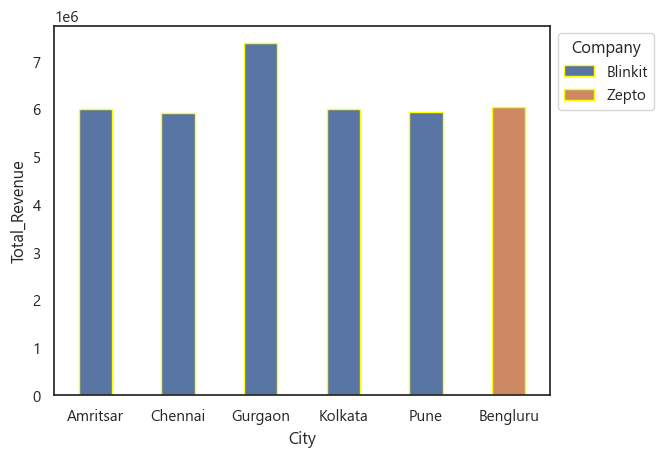

In [183]:
sns.barplot(data=best_cities, x='City', y='Total_Revenue', hue='Company', edgecolor='yellow', width=0.4)
plt.legend(title='Company', bbox_to_anchor=(1,1))
plt.show()

## 📌 Key Insight:
***High-performing cities such as Gurgaon, Chennai, and Pune exhibit strong revenue, customer ratings, and order volume, indicating high market potential for future platform expansion.***

<br><br>

## Q.7) Are discounts increasing order volumn or just reducing revenue?

In [184]:
# Count the number of orders with & without discount
df['Discount_Applied'].value_counts()

Discount_Applied
0    567906
1    379846
Name: count, dtype: int64

In [185]:
# Group Data - Calculate average order value 
dis_order_value = df.groupby('Discount_Applied')['Order_Value'].mean()
dis_order_value

Discount_Applied
0    476.417152
1    712.190830
Name: Order_Value, dtype: float64

In [186]:
# Group Data - Calculate sum of items count 
dis_items_count = df.groupby('Discount_Applied')['Items_Count'].sum()
dis_items_count

Discount_Applied
0    5854258
1    3920185
Name: Items_Count, dtype: int64

In [187]:
x = df['Discount_Applied'].unique()
print(x)

[1 0]


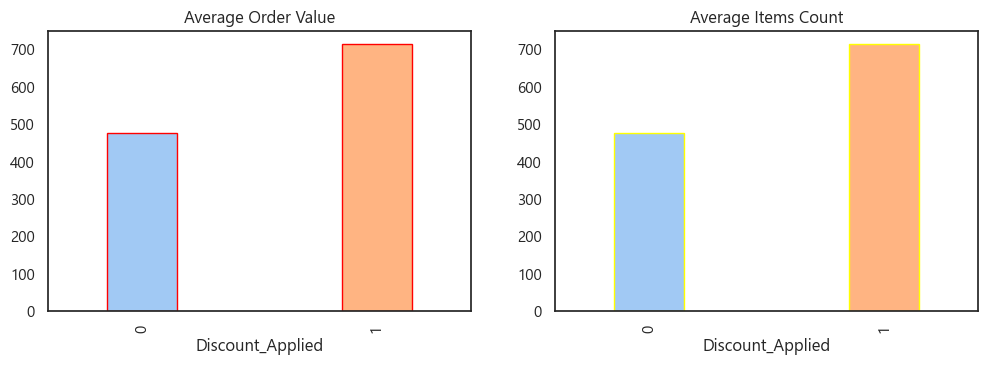

In [188]:
plt.figure(figsize=(12,8))

colors = sns.color_palette('pastel', len(x))

plt.subplot(2,2,1)
dis_order_value.plot(kind='bar', width=0.3, edgecolor='red', color=colors)
plt.title("Average Order Value")

plt.subplot(2,2,2)
dis_order_value.plot(kind='bar', width=0.3, edgecolor='yellow', color=colors)
plt.title("Average Items Count")

plt.show()

## 📌 Key Insight:
***Discounted orders show higher average basket size and item count, indicating that discounts drive volume growth rather than merely reducing revenue.***

<br><br>

## Q.8) Which quick commerce platform demonstrates the best operational efficiency based on order volume and delivery time?

In [248]:
com_efficiency = df.groupby('Company').agg(
                          Total_Orders = ('Order_ID', 'count'),
                          Avg_Delivery_Time = ('Delivery_Time_Min', 'mean')
                          ).reset_index()

com_efficiency

,Company,Total_Orders,Avg_Delivery_Time
0,Amazon Now,118083,18.984155
1,Big Basket,118047,18.027345
2,Blinkit,118887,15.121771
3,Dunzo,118463,14.177060
4,Flipkart Minutes,118965,17.045080
5,Jio Mart,118267,23.013224
6,Swiggy Instamart,118475,16.072690
7,Zepto,118565,9.644313


In [249]:
# Normalize values for fair comparison 
from sklearn.preprocessing import MinMaxScaler

# Scaling both columns to the same range (0-1) so that they can be fairly compared and combined
scaler = MinMaxScaler()  # Create a scaling object
com_efficiency[['Total_Orders_Scaled', 'Avg_Delivery_Time_Scaled']] = scaler.fit_transform(
                                                                                            com_efficiency[['Total_Orders', 'Avg_Delivery_Time']]
                                                                                           )

In [250]:
com_efficiency

,Company,Total_Orders,Avg_Delivery_Time,Total_Orders_Scaled,Avg_Delivery_Time_Scaled
0,Amazon Now,118083,18.984155,0.039216,0.698624
1,Big Basket,118047,18.027345,0.000000,0.627054
2,Blinkit,118887,15.121771,0.915033,0.409716
3,Dunzo,118463,14.177060,0.453159,0.339051
4,Flipkart Minutes,118965,17.045080,1.000000,0.553580
5,Jio Mart,118267,23.013224,0.239651,1.000000
6,Swiggy Instamart,118475,16.072690,0.466231,0.480845
7,Zepto,118565,9.644313,0.564270,0.000000


In [251]:
# Efficiency Score (higher orders, lower time) 
com_efficiency ['Efficiency_Score'] = com_efficiency['Total_Orders_Scaled'] - com_efficiency['Avg_Delivery_Time_Scaled']
com_efficiency

,Company,Total_Orders,Avg_Delivery_Time,Total_Orders_Scaled,Avg_Delivery_Time_Scaled,Efficiency_Score
0,Amazon Now,118083,18.984155,0.039216,0.698624,-0.659408
1,Big Basket,118047,18.027345,0.000000,0.627054,-0.627054
2,Blinkit,118887,15.121771,0.915033,0.409716,0.505317
3,Dunzo,118463,14.177060,0.453159,0.339051,0.114108
4,Flipkart Minutes,118965,17.045080,1.000000,0.553580,0.446420
5,Jio Mart,118267,23.013224,0.239651,1.000000,-0.760349
6,Swiggy Instamart,118475,16.072690,0.466231,0.480845,-0.014614
7,Zepto,118565,9.644313,0.564270,0.000000,0.564270


In [252]:
# Sort be Best Efficiency 
eff = com_efficiency.sort_values(by='Efficiency_Score', ascending=False)
eff

,Company,Total_Orders,Avg_Delivery_Time,Total_Orders_Scaled,Avg_Delivery_Time_Scaled,Efficiency_Score
7,Zepto,118565,9.644313,0.564270,0.000000,0.564270
2,Blinkit,118887,15.121771,0.915033,0.409716,0.505317
4,Flipkart Minutes,118965,17.045080,1.000000,0.553580,0.446420
3,Dunzo,118463,14.177060,0.453159,0.339051,0.114108
6,Swiggy Instamart,118475,16.072690,0.466231,0.480845,-0.014614
1,Big Basket,118047,18.027345,0.000000,0.627054,-0.627054
0,Amazon Now,118083,18.984155,0.039216,0.698624,-0.659408
5,Jio Mart,118267,23.013224,0.239651,1.000000,-0.760349


📊 Methodology:
Operational Efficiency Score is calculated by normalizing Total Orders (higher is better) and Average Delivery Time (lower is better) using Min-Max Scaling, and then combining them into a composite efficiency score.

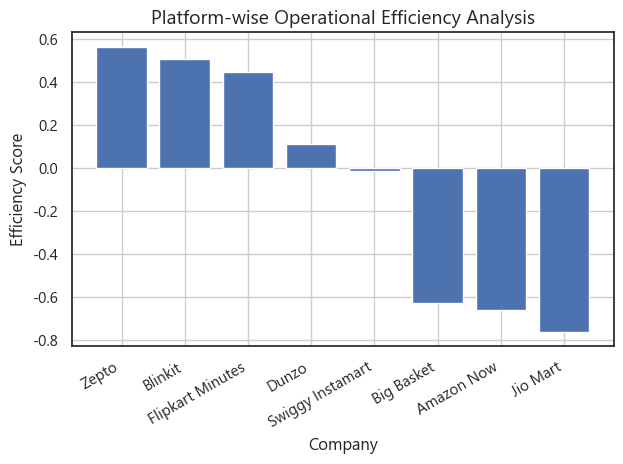

In [253]:
# Plot 
plt.bar(eff['Company'], eff['Efficiency_Score'])

plt.xlabel("Company")
plt.ylabel("Efficiency Score")
plt.title("Platform-wise Operational Efficiency Analysis", fontsize=14, fontweight='bold')
plt.xticks(rotation = 30, ha='right')

plt.grid(True)

plt.tight_layout()
plt.show()

In [254]:
# Use Plotly Librarry - Scatter Bubble Plot 
import plotly.express as px

# Create positive bubble size 
min_eff = eff['Efficiency_Score'].min() 
eff['Bubble_Size'] = eff['Efficiency_Score'] - min_eff + 0.1



# Plot 
fig = px.scatter(eff, x='Total_Orders', y='Avg_Delivery_Time', size='Bubble_Size', color='Company'
                ,text='Company', title='Operational Efficiency of Quick Commerce Platforms',
                hover_data={'Total_Orders':True, 'Avg_Delivery_Time': ':.2f', 'Efficiency_Score': ':.3f'},
                size_max= 40)

# Make Label cleaner 
fig.update_traces(textposition='middle center')

# Improve Chart 
fig.update_layout(
    xaxis_title="Total Orders (Operational Scale)",
    yaxis_title="Average Delivery Time (Operational Efficiency)",
    title_x=0.5,
    template='plotly_dark',  
    height=600
)

# Reverse Y-axis so best performers apper higher 
fig.update_yaxes(autorange='reversed')

fig.show()

## 📌 Key Insight:
***Zepto leads in operational efficiency due to high order volume and faster delivery, emphasizing the impact of logistics speed on platform performance.***

<br><br>

## **Mini Dashboard**

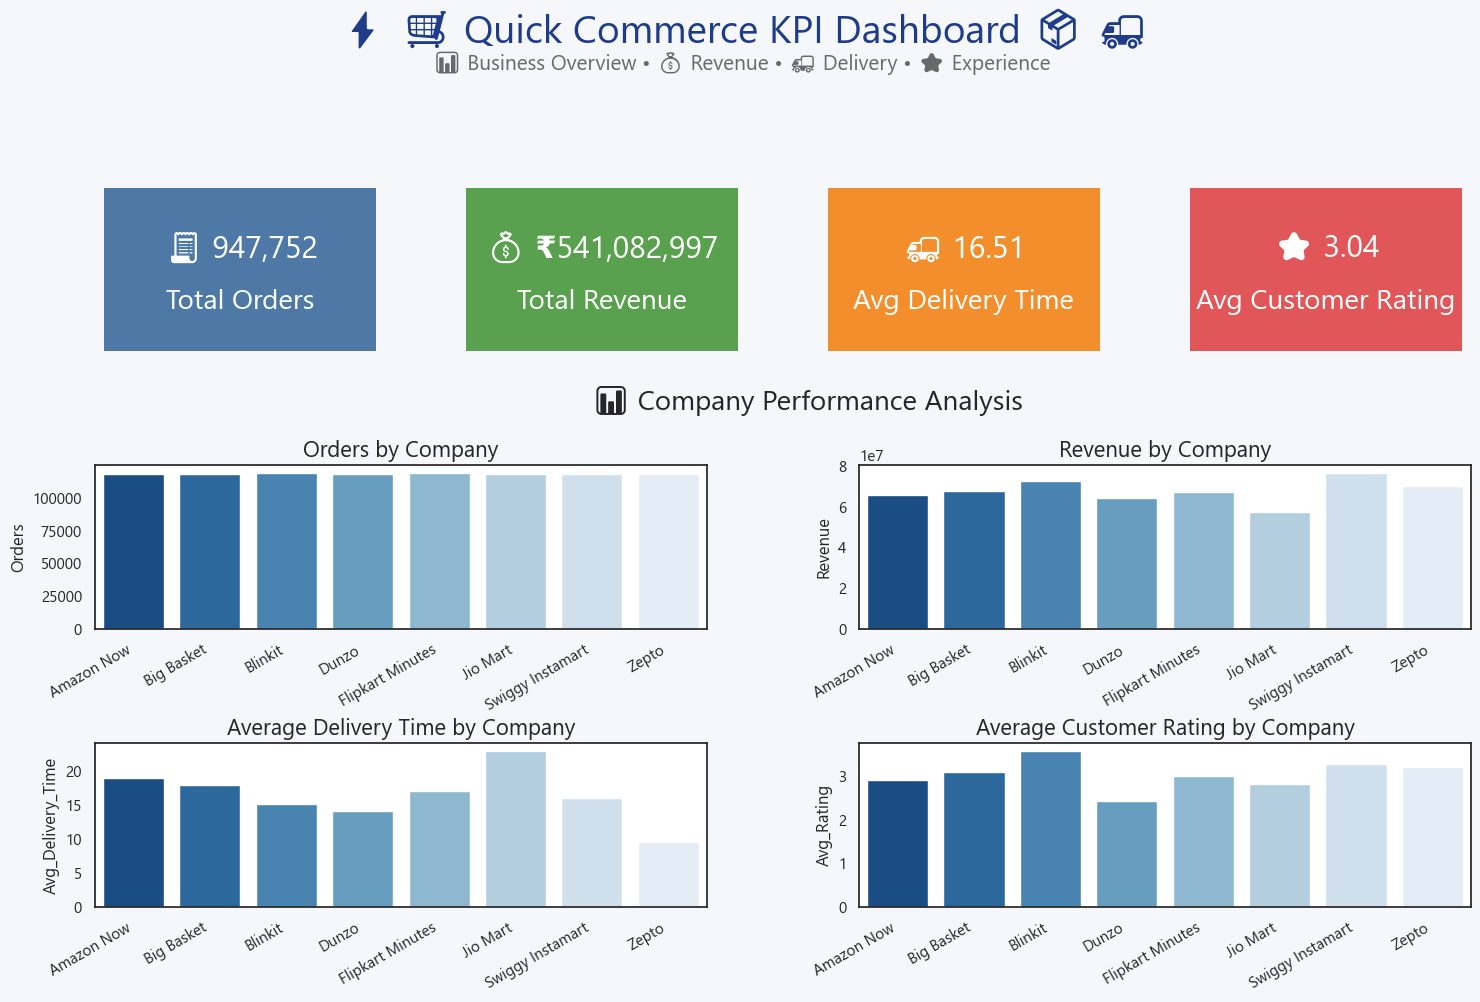

In [255]:
# ==========================================
# 🚀 PREMIUM QUICK COMMERCE KPI DASHBOARD
# ==========================================

# -------------------------------
# GLOBAL SETTINGS 
# -------------------------------
fig = plt.figure(figsize=(15,10), facecolor='#f5f7fb')
sns.set_style("white")


# -------------------------
# Dashboard Title
# ------------------------- 
plt.rcParams['font.family'] = ['Segoe UI Emoji', 'DejaVu Sans']
plt.suptitle("⚡ 🛒 Quick Commerce KPI Dashboard 📦 🚚", fontsize=28, ha='center', fontweight='bold', color='#1f3c88', y=1)
plt.figtext(0.5, 0.94, "📊 Business Overview • 💰 Revenue • 🚚 Delivery • ⭐ Experience", ha='center', fontsize=15, color='dimgrey')


# -------------------------------
# KPI CALCULATIONS
# -------------------------------
total_orders = df['Order_ID'].count()
total_revenue = df['Order_Value'].sum()
avg_delivery_time = df['Delivery_Time_Min'].mean()
avg_rating = df['Customer_Rating'].mean()


# --------------------
# KPI Cards
# --------------------
def kpi_card(position, value, title, color, icon):
    ax = plt.subplot2grid((3,4), position)
    ax.set_facecolor(color)
    ax.set_box_aspect(0.6) 
    ax.set_xticks([])
    ax.set_yticks([])
    
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    ax.text(0.5, 0.62, f"{icon} {value}", fontsize=22,
            ha='center', va='center', fontweight='bold', color='white')
    
    ax.text(0.5, 0.30, title, fontsize=20,
            ha='center', va='center', color='white', fontweight='bold')

# KPI Cards Row
kpi_card((0, 0), f"{total_orders:,}", "Total Orders", "#4e79a7", "🧾")
kpi_card((0, 1), f"₹{total_revenue:,.0f}", "Total Revenue", "#59a14f", "💰")
kpi_card((0, 2), f"{avg_delivery_time:.2f}", "Avg Delivery Time", "#f28e2b", "🚚")
kpi_card((0, 3), f"{avg_rating:.2f}", "Avg Customer Rating", "#e15759", "⭐")


# -------------------------
# Company Level Metrics
# -------------------------
company_metrics = df.groupby('Company').agg( Orders=('Order_ID', 'count'), 
                           Revenue=('Order_Value', 'sum'),
                           Avg_Delivery_Time=('Delivery_Time_Min', 'mean'),
                           Avg_Rating=('Customer_Rating', 'mean')).reset_index()

plt.figtext(0.4, 0.60, "📊 Company Performance Analysis", fontsize=20, fontweight='bold')
# -------------------------
# Charts Section
# ------------------------- 
palette = "Blues_r"

# Orders by Company
plt.subplot2grid((3,2), (1,0))
sns.barplot(data=company_metrics, x='Company', y='Orders', hue='Company', palette=palette, legend=False)
plt.title("Orders by Company", fontsize=16, fontweight='bold')
plt.xlabel("")
plt.xticks(rotation=30, ha='right')

# Revenue by Company
plt.subplot2grid((3,2), (1,1))
sns.barplot(data=company_metrics, x='Company', y='Revenue', hue='Company', palette=palette, legend=False)
plt.title("Revenue by Company", fontsize=16, fontweight='bold')
plt.xlabel("")
plt.xticks(rotation=30, ha='right')

# Avg Delivery Time by Company
plt.subplot2grid((3,2), (2,0))
sns.barplot(data=company_metrics, x='Company', y='Avg_Delivery_Time', hue='Company', palette=palette, legend=False)
plt.title("Average Delivery Time by Company", fontsize=16, fontweight='bold')
plt.xlabel("")
plt.xticks(rotation=30, ha='right')

# Avg Rating Time by Company
plt.subplot2grid((3,2), (2,1))
sns.barplot(data=company_metrics, x='Company', y='Avg_Rating', hue='Company', palette=palette, legend=False)
plt.title("Average Customer Rating by Company", fontsize=16, fontweight='bold')
plt.xlabel("")
plt.xticks(rotation=30, ha='right')



plt.tight_layout(rect=[0,0,1,0.90])
plt.subplots_adjust(hspace=0.7, wspace=0.25)
plt.show()